In [1]:
import BioSimSpace as bss

/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)



Sending anonymous Sire usage statistics to http://siremol.org.
For more information, see http://siremol.org/analytics
To disable, set the environment variable 'SIRE_DONT_PHONEHOME' to 1
To see the information sent, set the environment variable 
SIRE_VERBOSE_PHONEHOME equal to 1. To silence this message, set
the environment variable SIRE_SILENT_PHONEHOME to 1.



<>:20: DeprecationWarning: invalid escape sequence \D
<>:20: DeprecationWarning: invalid escape sequence \D
/tmp/ipykernel_482970/1951793914.py:20: DeprecationWarning: invalid escape sequence \D
  plt.ylabel("$\Delta\Delta$G$_{bind}$ / kcal$\cdot$mol$^{-1}$")


In [5]:
from Sire.Base import getShareDir as _getShareDir
import os as _os
import subprocess as _subprocess
import shlex as _shlex
_analyse_freenrg = _os.path.join(_os.path.normpath(_getShareDir()), "scripts", "analyse_freenrg.py")

In [6]:
_analyse_freenrg

'/home/jguven/Software/miniconda3/envs/bss-d/share/Sire/scripts/analyse_freenrg.py'

In [18]:
path = f"execution_model/outputs/SOMD/lig_h_1~lig_h_16/"
work_dir = path+"bound"
work_dir

'execution_model/outputs/SOMD/lig_h_1~lig_h_16/bound'

In [39]:
#!chmod 755 /home/jguven/Software/miniconda3/envs/bss-d/share/Sire/scripts/analyse_freenrg.py

In [19]:
command = f"python {_analyse_freenrg} mbar -i {work_dir}/lambda_*/simfile.dat -o {work_dir}/mbar.txt --overlap" 

# Run the first command.
#proc = _subprocess.run(_shlex.split(command), shell=False, stdout=_subprocess.PIPE, stderr=_subprocess.PIPE)

In [20]:
command

'python /home/jguven/Software/miniconda3/envs/bss-d/share/Sire/scripts/analyse_freenrg.py mbar -i execution_model/outputs/SOMD/lig_h_1~lig_h_16/bound/lambda_*/simfile.dat -o execution_model/outputs/SOMD/lig_h_1~lig_h_16/bound/mbar.txt --overlap'

In [4]:
path = f"execution_model/outputs/SOMD/lig_h_1~lig_h_15/"
free_dir = path+"free/"
pmf_free, om_f = bss.FreeEnergy.Relative.analyse(free_dir)
pmf_free

[(0.0, 0.0000e+00 kcal/mol, 0.0000e+00 kcal/mol),
 (0.1, 1.7967 kcal/mol, 0.0567 kcal/mol),
 (0.2, 5.3587 kcal/mol, 0.0758 kcal/mol),
 (0.3, 9.8344 kcal/mol, 0.0884 kcal/mol),
 (0.4, 14.7977 kcal/mol, 0.0980 kcal/mol),
 (0.5, 20.0685 kcal/mol, 0.1064 kcal/mol),
 (0.6, 25.4495 kcal/mol, 0.1145 kcal/mol),
 (0.7, 31.1274 kcal/mol, 0.1222 kcal/mol),
 (0.8, 37.0322 kcal/mol, 0.1297 kcal/mol),
 (0.9, 43.3191 kcal/mol, 0.1368 kcal/mol),
 (1.0, 49.9644 kcal/mol, 0.1439 kcal/mol)]

In [5]:
path = f"execution_model/outputs/SOMD/lig_h_1~lig_h_15/"
bound_dir = path+"bound/"
print(bound_dir)
pmf_bound, om_b = bss.FreeEnergy.Relative.analyse(bound_dir)
pmf_bound

execution_model/outputs/SOMD/lig_h_1~lig_h_15/bound/


[(0.0, 0.0000e+00 kcal/mol, 0.0000e+00 kcal/mol),
 (0.1, 2.0863 kcal/mol, 0.0808 kcal/mol),
 (0.2, 5.8327 kcal/mol, 0.1056 kcal/mol),
 (0.3, 10.5631 kcal/mol, 0.1217 kcal/mol),
 (0.4, 15.6064 kcal/mol, 0.1351 kcal/mol),
 (0.5, 20.9708 kcal/mol, 0.1458 kcal/mol),
 (0.6, 26.5903 kcal/mol, 0.1565 kcal/mol),
 (0.7, 32.3818 kcal/mol, 0.1668 kcal/mol),
 (0.8, 38.4137 kcal/mol, 0.1765 kcal/mol),
 (0.9, 44.7704 kcal/mol, 0.1858 kcal/mol),
 (1.0, 51.6139 kcal/mol, 0.1951 kcal/mol)]

In [6]:
freenrg = bss.FreeEnergy.Relative.difference(pmf_bound, pmf_free)
freenrg_val = round(freenrg[0].value(), 4)
freenrg_err = round(freenrg[1].value(), 4)

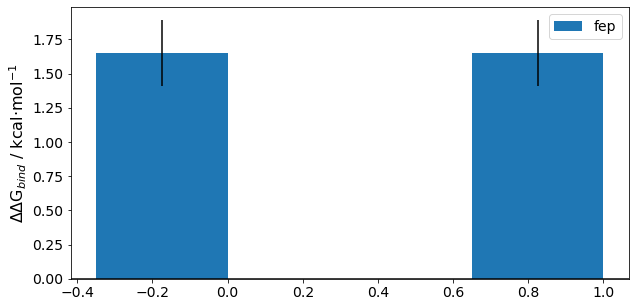

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# initiate an empty figure with fixed dimensions.
fig, ax = plt.subplots(figsize=(10,5))

# determine positions for X axis labels.
x_locs = np.arange(len(freenrg))

# set bar width
width = 0.35  

# plot both our experimental and FEP free energies using an offset on the x position so bars don't overlap.
ax.bar(x_locs - width/2, height=freenrg_val, width=width, yerr=freenrg_err,
                label='fep')
# ax.bar(x_locs + width/2, height=freenrg_df["freenrg_fep"], width=width, yerr=freenrg_df["err_fep"],
#                 label='FEP')
 
# format the plot further.
plt.axhline(color="black")
plt.ylabel("$\Delta\Delta$G$_{bind}$ / kcal$\cdot$mol$^{-1}$")
#plt.xticks(x_locs, freenrg_df.index, rotation=70, ha="right")
plt.legend()

#plt.savefig("outputs/fep_vs_exp_barplot.png", dpi=300)
plt.show()

In [86]:
def get_ti_pmf(full_path: str):
    """
    @param full_path: to mbar.txt file
    @return TI pmf values as a list of tuples
    """
    with open(full_path) as file:
        lines = file.readlines()
    
    first_index = 0
    last_index = 0
    for i in range(len(lines)):
        if "#PMF from TI in kcal/mol" in lines[i]:
            first_index = i + 1
        elif "#MBAR free energy difference in kcal/mol: " in lines[i]:
            last_index = i 
    messy = lines[first_index:last_index]
    ti_pmf = []
    for line in messy:
        new_line = line.split()
        lambda_value = float(new_line[0])
        energy_value = bss.Types.Energy(float(new_line[1]), "kcal/mol")
        error = bss.Types.Energy(0, "kcal/mol")
        tuple_line = (lambda_value, energy_value, error)
        ti_pmf.append(tuple_line)
    return ti_pmf


In [87]:
free_path = "execution_model/outputs/SOMD/lig_h_1~lig_h_10/free/mbar.txt"
bound_path = "execution_model/outputs/SOMD/lig_h_1~lig_h_10/bound/mbar.txt"

In [88]:
free_pmf = get_ti_pmf(free_path)
bound_pmf = get_ti_pmf(bound_path)

In [89]:
free_energy = bss.FreeEnergy.Relative.difference(bound_pmf, free_pmf)

In [93]:
free_energy_value = free_energy[0]
free_energy_error = round(free_energy[1].value(), 4)

In [94]:
free_energy_value

0.0000e+00 kcal/mol

# Test by removing one lambda window

In [21]:
bound_path = "execution_model/scripts/lig_h_1~lig_h_16/bound/"
free_path = "execution_model/scripts/lig_h_1~lig_h_16/free/"

In [22]:
pmf_bound, om_b = bss.FreeEnergy.Relative.analyse(bound_path)

AnalysisError: SOMD free-energy analysis failed!

In [26]:
import numpy as np
lam_arr = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

In [29]:
command = f"python {_analyse_freenrg} mbar --lam 0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9 -i {bound_path}/lambda_*/simfile.dat -o {bound_path}/mbar.txt --overlap" 

In [30]:
command


'python /home/jguven/Software/miniconda3/envs/bss-d/share/Sire/scripts/analyse_freenrg.py mbar --lam 0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9 -i execution_model/scripts/lig_h_1~lig_h_16/bound//lambda_*/simfile.dat -o execution_model/scripts/lig_h_1~lig_h_16/bound//mbar.txt --overlap'

In [ ]:
somd-freenrg -C ./somd.cfg -l 1.0000 -d 1 -c ./somd.rst7 -t ./somd.prm7 -m ./somd.pert -p OpenCL 1> somd.log 2> somd.err